In [ ]:
# --- IMPORTS ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

url = r"C:\Users\acts5\OneDrive\Test Data Files\cleaned_posture_dataset.csv"
df = pd.read_csv(url)
df.head()

,total_force_N,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_57,sensor_58,sensor_59,sensor_60,sensor_61,sensor_62,sensor_63,height_cm,weight_kg,bin_label
0,2.717212,0.406566,0.284767,0.327183,0.335559,0.351216,0.353589,0.372192,0.382360,0.604516,...,0.146247,0.419745,0.568086,0.73842,0.747668,0.758102,0.764987,0.075255,2.749453,0
1,2.716307,0.406566,0.284767,0.327183,0.335559,0.367498,0.353589,0.372192,0.382360,0.604516,...,0.146247,0.419745,0.568086,0.73842,0.747668,0.758102,0.764987,0.075255,2.749453,0
2,2.715458,0.406566,0.284767,0.342931,0.335559,0.367498,0.353589,0.372192,0.382360,0.604516,...,0.146247,0.419745,0.568086,0.73842,0.747668,0.758102,0.764987,0.075255,2.749453,0
3,2.716533,0.406566,0.284767,0.327183,0.351784,0.367498,0.353589,0.372192,0.382360,0.604516,...,0.146247,0.419745,0.568086,0.73842,0.747668,0.758102,0.764987,0.075255,2.749453,0
4,2.715458,0.406566,0.284767,0.342931,0.351784,0.367498,0.370029,0.372192,0.399117,0.604516,...,0.146247,0.419745,0.568086,0.73842,0.747668,0.758102,0.764987,0.075255,2.749453,0


****Extreme Gradient Boost Model****

c:\Users\acts5\miniconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\acts5\miniconda3\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Fold 1 F1-score: 0.9636


c:\Users\acts5\miniconda3\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Fold 2 F1-score: 0.9658


c:\Users\acts5\miniconda3\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Fold 3 F1-score: 0.9629


c:\Users\acts5\miniconda3\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Fold 4 F1-score: 0.9625


c:\Users\acts5\miniconda3\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Fold 5 F1-score: 0.9600

Mean CV F1: 0.9629785481257175


c:\Users\acts5\miniconda3\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\acts5\miniconda3\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\acts5\miniconda3\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\acts5\miniconda3\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in c

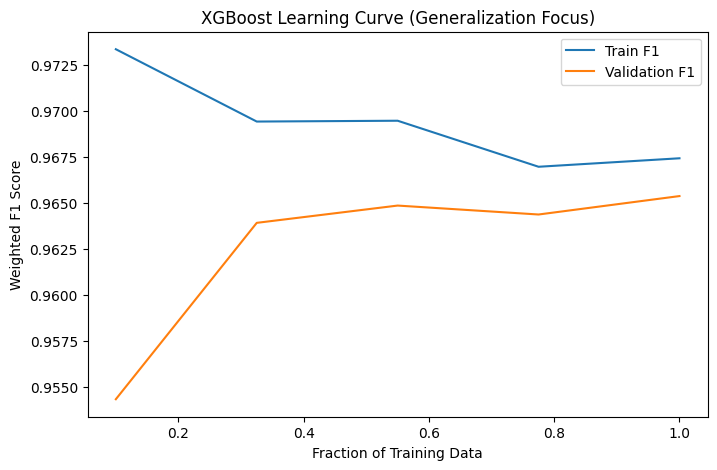


--- XGBoost Test Metrics ---
Precision: 0.9135, Recall: 0.9706, F1: 0.9412
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      8418
           1       0.91      0.97      0.94      3404

    accuracy                           0.97     11822
   macro avg       0.95      0.97      0.96     11822
weighted avg       0.97      0.97      0.97     11822



In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- SPLIT FEATURES AND LABELS ---
X = df.drop(columns=['bin_label'])
y = df['bin_label']

# --- TRAIN/TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- COMPUTE CLASS IMBALANCE ---
scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])

# --- XGBOOST MODEL (GENERALIZATION FOCUS) ---
xgb_model = XGBClassifier(
    objective='binary:logistic',
    n_estimators=500,
    max_depth=4,             # reduced depth
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.5,           # stronger L1 regularization
    reg_lambda=2,            # stronger L2 regularization
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    random_state=42,
    eval_metric='logloss'
)

# --- 2-FOLD CROSS-VALIDATION ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_f1_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train), 1):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    xgb_model.fit(
        X_tr, y_tr,
        eval_set=[(X_val, y_val)],
        early_stopping_rounds=50,
        verbose=False
    )
    
    y_val_pred = xgb_model.predict(X_val)
    f1 = f1_score(y_val, y_val_pred, average='weighted')
    cv_f1_scores.append(f1)
    print(f"Fold {fold} F1-score: {f1:.4f}")

print("\nMean CV F1:", np.mean(cv_f1_scores))

# --- LEARNING CURVE ---
train_sizes = np.linspace(0.1, 1.0, 5)
train_scores = []
val_scores = []

for size in train_sizes:
    subset_idx = np.random.choice(len(X_train), int(size * len(X_train)), replace=False)
    X_subset = X_train.iloc[subset_idx]
    y_subset = y_train.iloc[subset_idx]
    
    xgb_model.fit(
        X_subset, y_subset,
        eval_set=[(X_test, y_test)],
        early_stopping_rounds=50,
        verbose=False
    )
    
    train_pred = xgb_model.predict(X_subset)
    val_pred = xgb_model.predict(X_test)
    
    train_scores.append(f1_score(y_subset, train_pred, average='weighted'))
    val_scores.append(f1_score(y_test, val_pred, average='weighted'))

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_scores, label='Train F1')
plt.plot(train_sizes, val_scores, label='Validation F1')
plt.xlabel('Fraction of Training Data')
plt.ylabel('Weighted F1 Score')
plt.title('XGBoost Learning Curve (Generalization Focus)')
plt.legend()
plt.show()

# --- FINAL TEST METRICS ---
y_test_pred = xgb_model.predict(X_test)
y_test_prob = xgb_model.predict_proba(X_test)[:, 1]
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("\n--- XGBoost Test Metrics ---")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
print(classification_report(y_test, y_test_pred))



In [9]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import numpy as np

# --- Prepare arrays to store results ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_train_scores = []   # training F1 per fold
cv_val_scores = []     # validation F1 per fold

xgb_model = XGBClassifier(
    objective='binary:logistic',
    n_estimators=500,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.5,
    reg_lambda=2,
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]),
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train), 1):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Fit model
    xgb_model.fit(
        X_tr, y_tr,
        eval_set=[(X_val, y_val)],
        early_stopping_rounds=50,
        verbose=False
    )

    # Predict on train and val
    y_tr_pred = xgb_model.predict(X_tr)
    y_val_pred = xgb_model.predict(X_val)

    # Compute F1 scores
    train_f1 = f1_score(y_tr, y_tr_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    cv_train_scores.append(train_f1)
    cv_val_scores.append(val_f1)

    print(f"Fold {fold} Train F1: {train_f1:.4f}, Val F1: {val_f1:.4f}")

# --- Summary ---
print("\nCV Training F1 Scores:", cv_train_scores)
print("CV Validation F1 Scores:", cv_val_scores)
print("Mean CV Train F1:", np.mean(cv_train_scores))
print("Mean CV Validation F1:", np.mean(cv_val_scores))


c:\Users\acts5\miniconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\acts5\miniconda3\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Fold 1 Train F1: 0.9671, Val F1: 0.9636


c:\Users\acts5\miniconda3\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Fold 2 Train F1: 0.9655, Val F1: 0.9658


c:\Users\acts5\miniconda3\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Fold 3 Train F1: 0.9683, Val F1: 0.9629


c:\Users\acts5\miniconda3\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Fold 4 Train F1: 0.9674, Val F1: 0.9625


c:\Users\acts5\miniconda3\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Fold 5 Train F1: 0.9680, Val F1: 0.9600

CV Training F1 Scores: [0.9670652213397862, 0.965451152616899, 0.96826694421746, 0.9674089429275595, 0.9680454746803167]
CV Validation F1 Scores: [0.9635981242160083, 0.9658195772320483, 0.9629412032699648, 0.9624936277614305, 0.9600402081491354]
Mean CV Train F1: 0.9672475471564044
Mean CV Validation F1: 0.9629785481257175


**Model Deployment**

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report
import serial  # for Arduino serial input
import time
from joblib import load
from plyer import notification

# -------------------------
# 1. Load your trained model
# -------------------------
# If you saved your model:
from joblib import load
xgb_model = load('xgb_model.joblib')

# -------------------------
# 2. Preprocessing setup
# -------------------------
# Columns to use for prediction
feature_cols = ['total_force_N'] + [f'sensor_{i}' for i in range(64)] + ['height_cm', 'weight_kg']

# Example scaler fitted during training
scaler = StandardScaler()

# Suppose you have training data to fit the scaler (this must match training)
X_train_example = df[feature_cols]  # df from previous training
X_train_example['total_force_N'] = X_train_example['total_force_N'].abs()  # absolute total_force_N
X_train_scaled = scaler.fit_transform(X_train_example)  # fit scaler on training data

# -------------------------
# 3. Setup Arduino serial
# -------------------------
# Adjust COM port and baudrate for your device
arduino_port = 'COM3'
baud_rate = 9600
ser = serial.Serial(arduino_port, baud_rate, timeout=1)
time.sleep(2)  # give Arduino time to initialize

# -------------------------
# 4. Notification function
# -------------------------
def send_notification(message):
    notification.notify(
        title="Posture Alert",
        message=message,
        timeout=5  # seconds
    )

# -------------------------
# 4. Live prediction loop
# -------------------------
try:
    while True:
        if ser.in_waiting > 0:
            line = ser.readline().decode('utf-8').strip()
            
            # Example: parse CSV line from Arduino
            # Arduino sends: total_force,s0,s1,...,s63,height,weight
            values = line.split(',')
            if len(values) != len(feature_cols):
                print("Incorrect number of features")
                continue
            
            live_data = pd.DataFrame([values], columns=feature_cols)
            
            # Convert numeric columns to float
            numeric_cols = ['total_force_N'] + [f'sensor_{i}' for i in range(64)] + ['height_cm', 'weight_kg']
            live_data[numeric_cols] = live_data[numeric_cols].astype(float)
            
            # Absolute value total_force
            live_data['total_force_N'] = live_data['total_force_N'].abs()
            
            # Standardize using training scaler
            live_scaled = scaler.transform(live_data)
            
            # Predict
            prediction = xgb_model.predict(live_scaled)[0]
            prob = xgb_model.predict_proba(live_scaled)[0, 1]
            
            # Notify / print result
            print(f"Prediction: {prediction}, Probability: {prob:.4f}")
            
            # Send notification if alert
            if prediction == 1 or prob > 0.5:  # threshold can be adjusted
                send_notification(f"Alert! Uncomfortable posture detected.\nProbability: {prob:.2f}")
except KeyboardInterrupt:
    print("Stopping live prediction.")
finally:
    ser.close()
